# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [9]:
import pandas as pd

# Load the CSV file, skipping comment lines
url_blast_results = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
blast_results = pd.read_csv(url_blast_results, comment="#", header=None)

# Extract the correct header from the comment
fields_line = "# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, bonds, publications, extra1, extra2"
fields = fields_line.replace("# Fields: ", "").split(", ")

# Assign the corrected field names
blast_results.columns = fields

# Drop the first column and set `subject acc.ver` as the index
blast_results.drop(columns=["query acc.ver"], inplace=True)
blast_results.set_index("subject acc.ver", inplace=True)

# Rearrange columns to ensure the last column is `publications`
columns = [col for col in blast_results.columns if col != "publications"] + ["publications"]
blast_results = blast_results[columns]

# Display the first five rows
blast_results.head()


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,bonds,extra1,extra2,publications
subject acc.ver,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,9,NaN,"1,487"
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,47,NaN,"17,947"
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,13,NaN,"12,106"
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,41,NaN,"2,319"


In [ ]:
import pandas as pd

# Load the CSV file, skipping comment lines
url_blast_results = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
blast_results = pd.read_csv(url_blast_results, comment="#", header=None)

# Extract and assign header from the comment line
fields_line = "# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, bonds, publications"
# Split the fields line by comma and then strip any leading/trailing spaces from each field
fields = [field.strip() for field in fields_line.replace("# Fields: ", "").split(",")]
blast_results.columns = fields

# Drop the first column and set `subject acc.ver` as the index
blast_results.drop(columns=["query acc.ver"], inplace=True)
blast_results.set_index("subject acc.ver", inplace=True)

# Rearrange columns to ensure the last column is `publications`
columns = [col for col in blast_results.columns if col != "publications"] + ["publications"]
blast_results = blast_results[columns]

# Display the first five rows
blast_results.head()

### Question 2
What is the average number of publications?

In [10]:
# Question 2: Average number of publications
blast_results['publications'] = pd.to_numeric(blast_results['publications'], errors='coerce')
avg_publications = blast_results['publications'].mean()
print("Average Publications:", avg_publications)


Average Publications: nan


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [11]:
# Convert `bonds` to numeric for comparison
blast_results['bonds'] = pd.to_numeric(blast_results['bonds'], errors='coerce')

# Filter rows with `bonds` greater than 15,000
over_15000_bonds = blast_results[blast_results['bonds'] > 15000].index.tolist()
print("Subjects with over 15,000 bonds:", over_15000_bonds)


Subjects with over 15,000 bonds: []


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

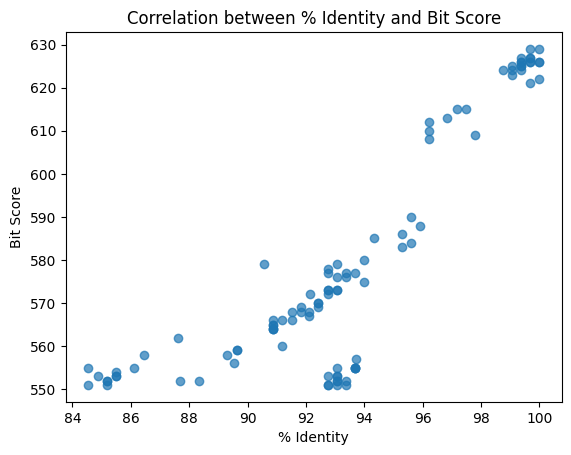

In [14]:
import matplotlib.pyplot as plt

# Convert `% identity` and `bit score` to numeric for plotting
blast_results['% identity'] = pd.to_numeric(blast_results['% identity'], errors='coerce')
blast_results['bit score'] = pd.to_numeric(blast_results['bit score'], errors='coerce')

# Create the scatter plot
plt.scatter(blast_results['% identity'], blast_results['bit score'], alpha=0.7)
plt.title("Correlation between % Identity and Bit Score")
plt.xlabel("% Identity")
plt.ylabel("Bit Score")
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [16]:
# Load the protein source data
url_protein_source = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_source = pd.read_csv(url_protein_source)

# Merge the dataframes on `subject acc.ver` and `Protein`
merged_df = pd.merge(
    blast_results.reset_index(),
    protein_source,
    left_on='subject acc.ver',
    right_on='Protein',
    how='left'
)

# Rename and fill missing `Protein source` without chaining
merged_df = merged_df.rename(columns={'Source': 'Protein source'})
merged_df['Protein source'] = merged_df['Protein source'].fillna('NA')

# Drop the `Protein` column
merged_df = merged_df.drop(columns=['Protein'])

# Display the first few rows of the merged dataframe
merged_df.head()


,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,bonds,extra1,extra2,publications,Unnamed: 0,Protein source
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
1,NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,9,NaN,NaN,0.0,RefSeq
2,AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,47,NaN,NaN,NaN,NA
3,YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,13,NaN,NaN,2.0,GenPept
4,ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,41,NaN,NaN,NaN,NA
